In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits

from cycspec_simulator import (
    TemplateProfile,
    BasebandModel,
    FreqOnlyPredictor,
    cycfold4,
)

%matplotlib notebook

In [3]:
template_file = "B1937+21.Rcvr1_2.GUPPI.15y.x.sum.sm"
template = TemplateProfile.from_file(template_file)
template.normalize()
template.make_posdef()

Adjusting I**2 by 5.5361972783884994e-08


<IPython.core.display.Javascript object>


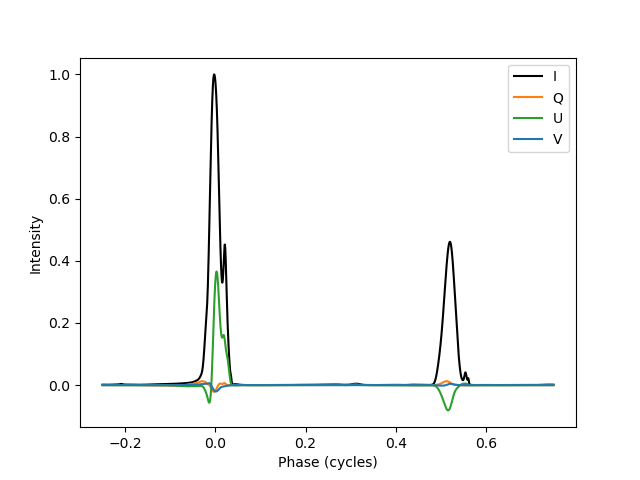

In [4]:
template.plot(what='IQUV', shift=0.25)
plt.show()

In [11]:
pulse_freq = 641.948222127829 # Hz
bandwidth = 1.5625e6 # Hz

In [12]:
model = BasebandModel(template, bandwidth=bandwidth, pulse_freq=pulse_freq)
data = model.sample(2**20)

In [13]:
predictor = FreqOnlyPredictor(pulse_freq)
pspec_xx, pspec_yy = periodic_spectrum_cycfold4(data, 128, 256, predictor)

<IPython.core.display.Javascript object>


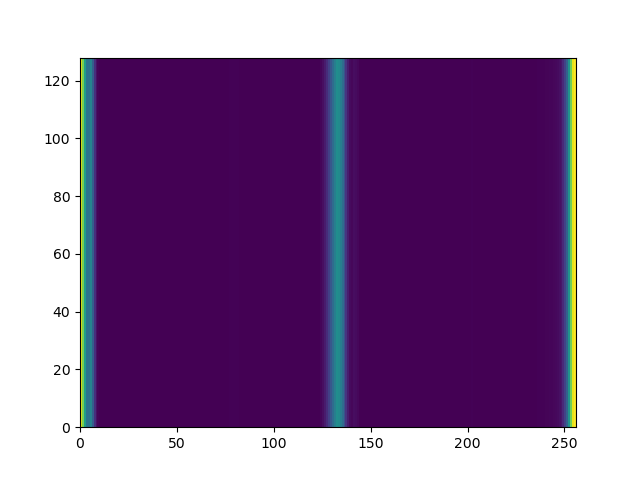

In [14]:
plt.pcolormesh(pspec_xx)

<IPython.core.display.Javascript object>


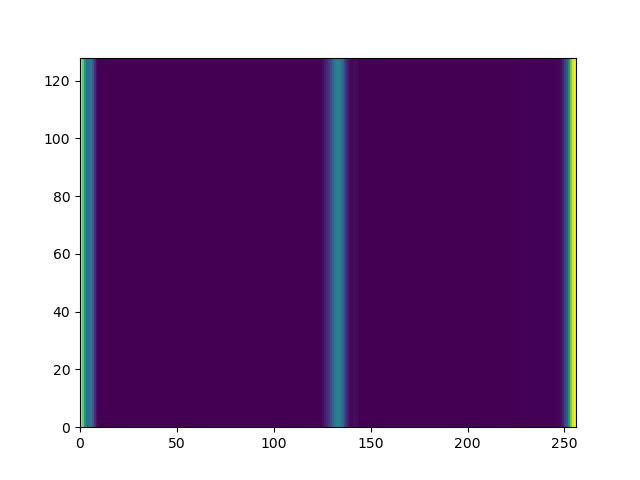

In [15]:
plt.pcolormesh(pspec_yy)